## Professional Scene Modeling

Using the dataset from Oracle's Elixir that Jerry prepped and engineered to match better with the soloq dataset I begin my modeling process below.

I'll be following a similar process as I did with diamond_modeling

In [1]:
import pandas as pd
import numpy as np

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# I'm importing a functions.py file that I created so I can reuse a scoring function in the file
import sys
if not 'Notebooks/Individual/Jake' in sys.path:
    sys.path.append('Notebooks/Individual/jake')
from functions import ScoreModel

# the below lines are to play an alert sound for when the notebook finishes running
import IPython
sound_file = '../../../archive/sounds/puzzle_solved_jingle.wav'

pd.set_option('display.max_columns', None)

#### Reading in the dataset to make sure I've got the correct data with the correct features

In [2]:
df = pd.read_csv("../../../archive/2021_LoL_esports_match_data_from_YaBoi_20210713.csv")
df.head()

,gameId,blueChampions,blueWins,blueFirstBlood,blueFirstBloodAssist,blueTotalGold,blueTotalExperience,blueTotalCS,blueGoldDiff,blueExperienceDiff,blueCsdiffat10,blueKills,blueAssists,blueDeaths,redChampions,redFirstBloodAssist,redTotalGold,redTotalExperience,redTotalCS,redAssists
0,ESPORTSTMNT03/1632489,"[('Mordekaiser', 'top'), ('Graves', 'jng'), ('...",1,1.0,0.0,16291.0,20459.0,382.0,1793.0,2365.0,65.0,1.0,0.0,0.0,"[('Ornn', 'top'), ('Kindred', 'jng'), ('Oriann...",0.0,14498.0,18094.0,317.0,0.0
1,ESPORTSTMNT03/1632500,"[('Gragas', 'top'), ('Graves', 'jng'), ('Rumbl...",0,1.0,0.0,15623.0,19210.0,340.0,759.0,171.0,-8.0,1.0,3.0,0.0,"[('Ornn', 'top'), ('Olaf', 'jng'), ('Syndra', ...",0.0,14864.0,19039.0,348.0,0.0
2,ESPORTSTMNT03/1632502,"[('Gragas', 'top'), ('Graves', 'jng'), ('Zoe',...",0,1.0,0.0,15043.0,16987.0,275.0,73.0,-1.0,-24.0,3.0,3.0,2.0,"[('Rumble', 'top'), ('Nidalee', 'jng'), ('Yone...",0.0,14970.0,16988.0,299.0,4.0
3,6909-9183,"[('Karma', 'top'), ('Pantheon', 'jng'), ('Synd...",0,1.0,0.0,16177.0,19640.0,380.0,732.0,75.0,20.0,1.0,1.0,0.0,"[('Aatrox', 'top'), ('Nidalee', 'jng'), ('Vikt...",0.0,15445.0,19565.0,360.0,0.0
4,6909-9184,"[('Jax', 'top'), ('Hecarim', 'jng'), ('Orianna...",0,0.0,0.0,16752.0,20020.0,361.0,1502.0,1164.0,40.0,2.0,2.0,1.0,"[('Camille', 'top'), ('Lillia', 'jng'), ('Vikt...",0.0,15250.0,18856.0,321.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8278 entries, 0 to 8277
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gameId                8274 non-null   object 
 1   blueChampions         8278 non-null   object 
 2   blueWins              8278 non-null   int64  
 3   blueFirstBlood        8278 non-null   float64
 4   blueFirstBloodAssist  8278 non-null   float64
 5   blueTotalGold         7728 non-null   float64
 6   blueTotalExperience   7728 non-null   float64
 7   blueTotalCS           7728 non-null   float64
 8   blueGoldDiff          7728 non-null   float64
 9   blueExperienceDiff    7728 non-null   float64
 10  blueCsdiffat10        7728 non-null   float64
 11  blueKills             7728 non-null   float64
 12  blueAssists           7728 non-null   float64
 13  blueDeaths            7728 non-null   float64
 14  redChampions          8278 non-null   object 
 15  redFirstBloodAssist  

#### Making our first / baseline XGBClassifer model

This time instead of doing a gridsearch I decided to see if the same best parameters for our model of the soloq data work as well for the pro data.

In [4]:
col = ["gameId", "blueWins", "blueChampions", "redChampions"]
X = df.drop(columns = col, axis = 1)
y = df["blueWins"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=57)

boost_model = XGBClassifier(random_state=57, objective="reg:logistic",
                            learning_rate= 0.05, max_depth = 3, min_child_weight = 5,
                            n_estimators = 100, subsample = 0.6)
boost_model.fit(X_train, y_train);

In [5]:
print("Training Scores")
print(ScoreModel(boost_model, X_train, y_train))

print("Test Scores")
print(ScoreModel(boost_model, X_test, y_test))

Training Scores
Accuracy:   0.7222938144329897
F1 Score:   0.7470657276995305
Recall:     0.7675610491407898
Precision:  0.7276364675621606
ROC_AUC:    0.718958663622626
None
Test Scores
Accuracy:   0.6956521739130435
F1 Score:   0.7157039711191336
Recall:     0.7439024390243902
Precision:  0.6895652173913044
ROC_AUC:    0.6941623748906812
None


#### So this model performs worse than our soloq model does, but without a comparison we wont know if the best parameters are the same.

In the meantime, I still want to check feature importances

In [6]:
features = list(zip(X_train.columns, 100*(np.round(boost_model.feature_importances_, 4))))
features

[('blueFirstBlood', 6.45),
 ('blueFirstBloodAssist', 0.0),
 ('blueTotalGold', 3.6),
 ('blueTotalExperience', 3.7500002),
 ('blueTotalCS', 4.2),
 ('blueGoldDiff', 40.28),
 ('blueExperienceDiff', 8.91),
 ('blueCsdiffat10', 6.79),
 ('blueKills', 3.5300002),
 ('blueAssists', 3.4),
 ('blueDeaths', 2.96),
 ('redFirstBloodAssist', 0.0),
 ('redTotalGold', 4.7),
 ('redTotalExperience', 3.72),
 ('redTotalCS', 3.44),
 ('redAssists', 4.27)]

#### For this model our general trends are overall the same, however, first bloods and gold difference seem to matter more than compared to our soloq data.

#### Below we go ahead ad perform a gridsearch using XGBC to verify our best parameters and if different, compare performances.

In [7]:
boost_model2 = XGBClassifier(random_state=57, objective="reg:logistic")

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [2, 3, 4, 5],
    'min_child_weight': [1, 2, 3, 4, 5, 6],
    'subsample': [0.4, 0.5, 0.6, 0.7],
    'n_estimators': [30, 50, 100]
}

gridsearch = GridSearchCV(boost_model2, param_grid, cv=3, scoring="accuracy", n_jobs=1)
gridsearch.fit(X_train, y_train)
gridsearch.best_params_

{'learning_rate': 0.05,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 50,
 'subsample': 0.4}

#### Unsurprisingly our best parameters are different for the pro data, let's go ahead and score this model.

In [8]:
print("Training Scores")
print(ScoreModel(gridsearch, X_train, y_train))

print("Test Scores")
print(ScoreModel(gridsearch, X_test, y_test))

Training Scores
Accuracy:   0.7200386597938144
F1 Score:   0.7460549386323787
Recall:     0.7696713898100693
Precision:  0.7238446271618939
ROC_AUC:    0.7163818726981858
None
Test Scores
Accuracy:   0.6980676328502415
F1 Score:   0.7173224785165084
Recall:     0.7439024390243902
Precision:  0.6925764192139738
ROC_AUC:    0.6966524147313187
None


#### Only ever so slightly better accuracy scores for our gridsearch model, and the data is still overfit.

Time to check feature importances

In [9]:
boost_model2 = XGBClassifier(random_state=57, objective="reg:logistic",
                            learning_rate= 0.05, max_depth = 4, min_child_weight = 5,
                            n_estimators = 50, subsample = 0.4)
boost_model2.fit(X_train, y_train)

features = list(zip(X_train.columns, 100*(np.round(boost_model2.feature_importances_, 4))))
features

[('blueFirstBlood', 5.44),
 ('blueFirstBloodAssist', 0.0),
 ('blueTotalGold', 4.66),
 ('blueTotalExperience', 5.07),
 ('blueTotalCS', 4.36),
 ('blueGoldDiff', 36.92),
 ('blueExperienceDiff', 8.7),
 ('blueCsdiffat10', 7.4600005),
 ('blueKills', 4.5899997),
 ('blueAssists', 3.82),
 ('blueDeaths', 3.17),
 ('redFirstBloodAssist', 0.0),
 ('redTotalGold', 5.15),
 ('redTotalExperience', 3.7500002),
 ('redTotalCS', 3.9),
 ('redAssists', 3.02)]

In [10]:
drop_c = ["blueFirstBloodAssist", "redFirstBloodAssist"]
X_train_gold = X_train.drop(columns=drop_c, axis=1)
X_test_gold = X_test.drop(columns=drop_c, axis=1)

gold_model = XGBClassifier(random_state=57, objective="reg:logistic")

gold = GridSearchCV(boost_model, param_grid, cv=3, scoring="accuracy", n_jobs=1)
gold.fit(X_train_gold, y_train)
print("gold.best_params_")

gold.best_params_


In [11]:
ScoreModel(gold, X_train_gold, y_train)

Accuracy:   0.7200386597938144
F1 Score:   0.7460549386323787
Recall:     0.7696713898100693
Precision:  0.7238446271618939
ROC_AUC:    0.7163818726981858


In [12]:
ScoreModel(gold, X_test_gold, y_test)

Accuracy:   0.6980676328502415
F1 Score:   0.7173224785165084
Recall:     0.7439024390243902
Precision:  0.6925764192139738
ROC_AUC:    0.6966524147313187


In [13]:
gold_boost = boost_model2 = XGBClassifier(random_state=57, objective="reg:logistic",
                            learning_rate= 0.1, max_depth = 4, min_child_weight = 2,
                            n_estimators = 30, subsample = 0.5)
gold_boost.fit(X_train_gold, y_train)

features = list(zip(X_train_gold.columns, 100*(np.round(gold_boost.feature_importances_, 4))))
features

[('blueFirstBlood', 5.83),
 ('blueTotalGold', 3.88),
 ('blueTotalExperience', 4.16),
 ('blueTotalCS', 3.2),
 ('blueGoldDiff', 38.93),
 ('blueExperienceDiff', 7.8900003),
 ('blueCsdiffat10', 6.38),
 ('blueKills', 3.26),
 ('blueAssists', 3.96),
 ('blueDeaths', 5.2799997),
 ('redTotalGold', 4.62),
 ('redTotalExperience', 4.28),
 ('redTotalCS', 4.08),
 ('redAssists', 4.28)]

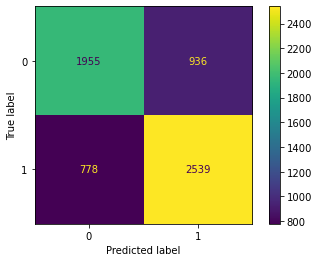

In [14]:
plot_confusion_matrix(gold_boost, X_train_gold, y_train)

In [18]:
df_LR = df.dropna()

col = ["gameId", "blueWins", "blueChampions", "redChampions", "blueFirstBloodAssist", "redFirstBloodAssist"]
X_LR = df_LR.drop(col, axis=1)
y_LR = df_LR["blueWins"]

X_tr, X_te, y_tr, y_te = train_test_split(X_LR, y_LR, random_state=57)

logreg = LogisticRegression().fit(X_tr, y_tr)

print("Training: ")
ScoreModel(logreg, X_tr, y_tr)

print("Test: ")
ScoreModel(logreg, X_te, y_te)

Training: 
Accuracy:   0.7143103745900224
F1 Score:   0.737259882521035
Recall:     0.7529182879377432
Precision:  0.722239502332815
ROC_AUC:    0.7116381768223231
Test: 
Accuracy:   0.7037804246504402
F1 Score:   0.7260536398467433
Recall:     0.7438665358194309
Precision:  0.7090739008419084
ROC_AUC:    0.7014288819448031


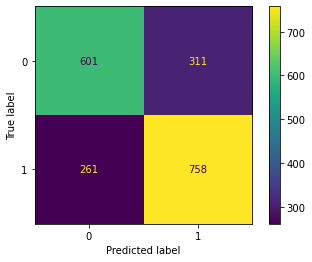

In [19]:
plot_confusion_matrix(logreg, X_te, y_te)

In [15]:
IPython.display.Audio(sound_file, autoplay=True, rate=1000)

In [21]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(gold_boost)
shap_values = explainer.shap_values(X_train_gold)

shap.force_plot(explainer.expected_value, shap_values[0,:], X_train_gold.iloc[0,:])

In [22]:
shap.force_plot(explainer.expected_value, shap_values[:1000,:], X_train_gold.iloc[:1000,:])

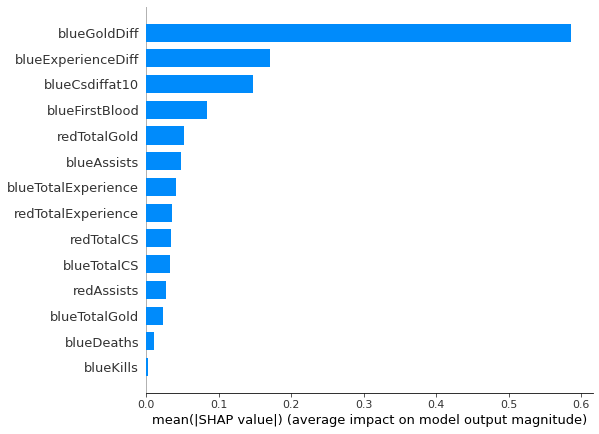

In [23]:
shap.summary_plot(shap_values, X_train_gold, plot_type="bar")

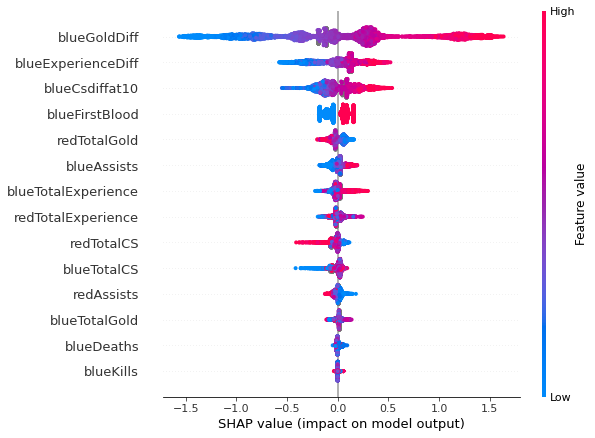

In [25]:
shap.summary_plot(shap_values, X_train_gold)

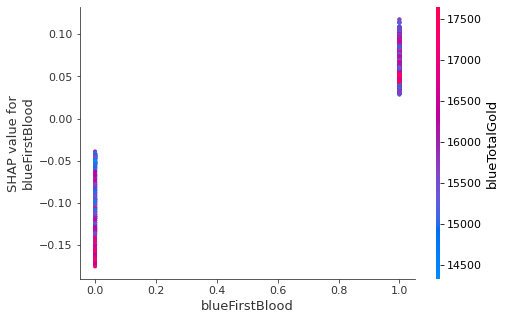

invalid value encountered in true_divide
invalid value encountered in true_divide


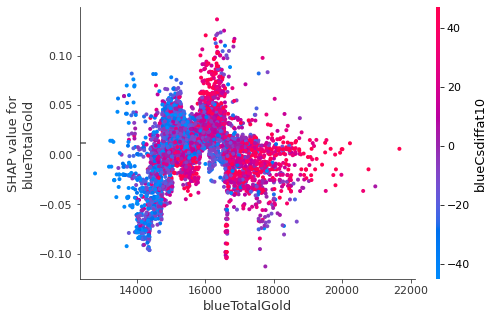

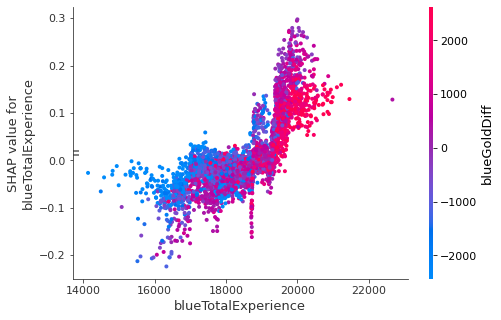

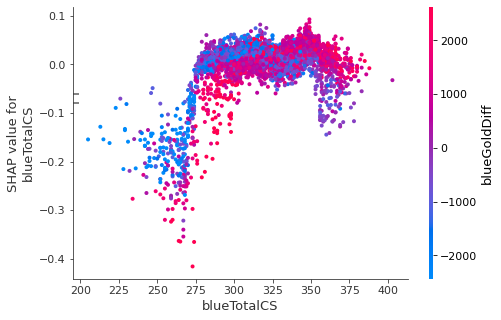

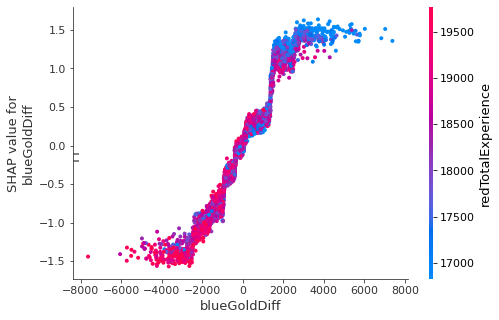

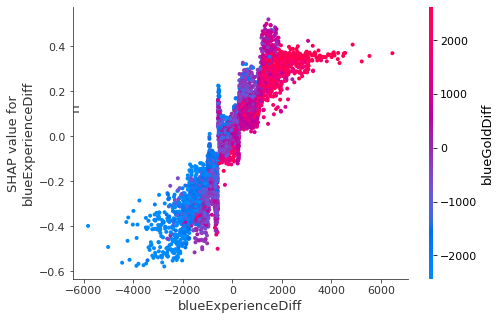

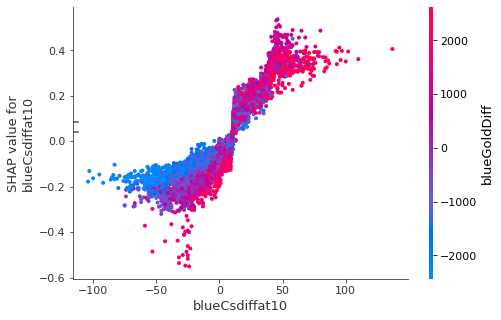

invalid value encountered in true_divide
invalid value encountered in true_divide


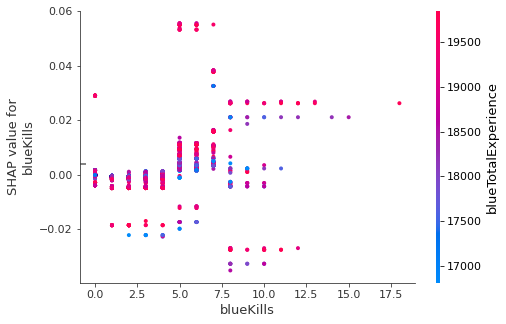

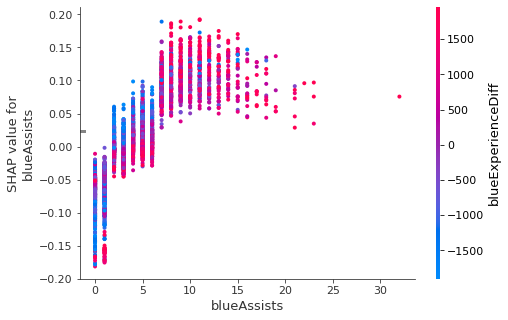

invalid value encountered in true_divide
invalid value encountered in true_divide


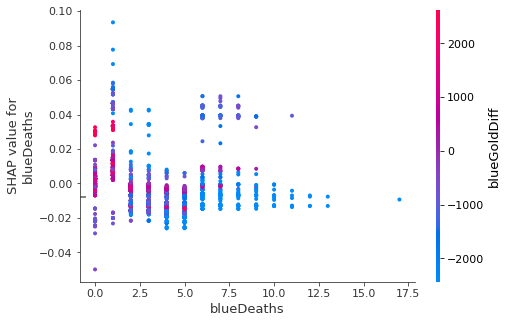

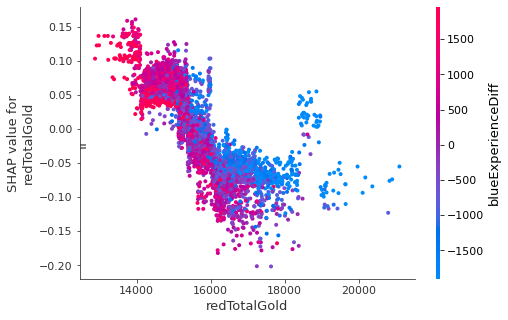

invalid value encountered in true_divide
invalid value encountered in true_divide


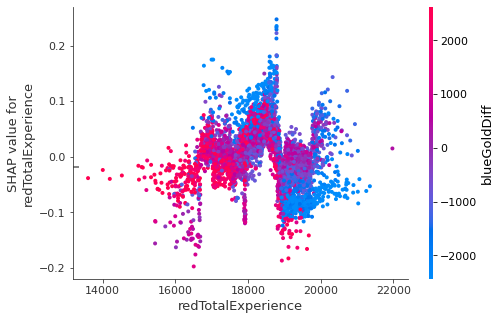

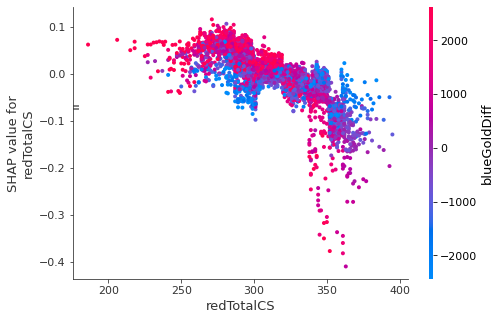

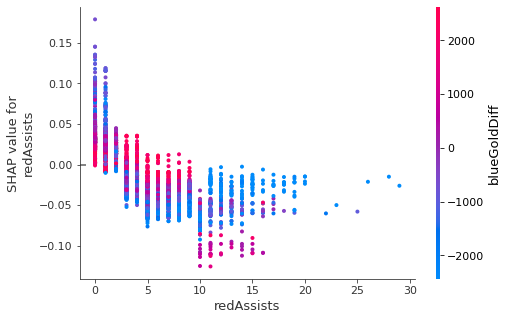

In [26]:
for name in X_train_gold.columns:
    shap.dependence_plot(name, shap_values, X_train_gold, display_features=X_train_gold)